In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [155]:
df = pd.read_csv('vuln_exploit.csv')

Columns - [quid, cve_id, tite, cvss_vector_string, exploit_found_date] these columns were deleted from the csv file while doing EDA in the Excel sheet

In [156]:
df.shape

(3495, 25)

In [139]:
df.columns

Index(['total_vulns', 'type', 'cvss_score', 'cvss_base_score',
       'severity_level', 'cvss_severity', 'cvss_temporal', 'category',
       'cvss.access.complexity', 'cvss.access.vector', 'cvss.authentication',
       'cvss.base', 'cvss.exploitability', 'cvss.impact.availability',
       'cvss.impact.confidentiality', 'cvss.impact.integrity',
       'cvss.remediation_level', 'cvss.report_confidence', 'ExploitName',
       'Is_Verified', 'ExploitID', 'exploit_type', 'Exploited', 'vendor',
       'tag'],
      dtype='object')

In [68]:
df.info().isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_vulns                  3495 non-null   int64  
 1   type                         3495 non-null   object 
 2   cvss_score                   3495 non-null   float64
 3   cvss_base_score              3495 non-null   float64
 4   severity_level               3495 non-null   int64  
 5   cvss_severity                3495 non-null   object 
 6   cvss_temporal                3495 non-null   float64
 7   category                     3495 non-null   object 
 8   cvss.access.complexity       3495 non-null   int64  
 9   cvss.access.vector           3495 non-null   int64  
 10  cvss.authentication          3495 non-null   int64  
 11  cvss.base                    3495 non-null   float64
 12  cvss.exploitability          3495 non-null   int64  
 13  cvss.impact.availa

AttributeError: 'NoneType' object has no attribute 'isna'

In [140]:
df.isna().sum()


total_vulns                       0
type                              0
cvss_score                        0
cvss_base_score                   0
severity_level                    0
cvss_severity                     0
cvss_temporal                     0
category                          0
cvss.access.complexity            0
cvss.access.vector                0
cvss.authentication               0
cvss.base                         0
cvss.exploitability               0
cvss.impact.availability          0
cvss.impact.confidentiality       0
cvss.impact.integrity             0
cvss.remediation_level            0
cvss.report_confidence            0
ExploitName                    3306
Is_Verified                    3306
ExploitID                      3306
exploit_type                   3310
Exploited                         0
vendor                            0
tag                               0
dtype: int64

In [141]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
total_vulns,3495.0,243.43,2475.13,1.0,2.0,13.0,22.0,92038.0
cvss_score,3495.0,6.08,1.57,0.0,5.0,6.0,7.3,9.5
cvss_base_score,3495.0,7.82,1.86,0.0,6.8,7.6,9.3,10.0
severity_level,3495.0,3.93,0.76,1.0,3.5,4.0,4.0,5.0
cvss_temporal,3495.0,6.08,1.57,0.0,5.0,6.0,7.3,9.5
cvss.access.complexity,3495.0,1.59,0.65,1.0,1.0,2.0,2.0,3.0
cvss.access.vector,3495.0,2.92,0.38,1.0,3.0,3.0,3.0,3.0
cvss.authentication,3495.0,1.12,0.32,1.0,1.0,1.0,1.0,2.0
cvss.base,3495.0,7.82,1.86,0.0,6.8,7.6,9.3,10.0
cvss.exploitability,3495.0,1.75,0.76,1.0,1.0,2.0,2.0,4.0


In [71]:
df['ExploitName'].unique()

array(['Cisco IOS 12.x/11.x - HTTP Remote Integer Overflow - Hardware remote Exploit',
       nan,
       "OpenSSH 6.8 < 6.9 - 'PTY' Local Privilege Escalation - Linux local Exploit",
       'Cisco IOS 12.2 < 12.4 / 15.0 < 15.6 - Security Association Negotiation Request Device Memory - Hardware remote Exploit',
       'Apache 2.4.23 mod_http2 - Denial of Service - Linux dos Exploit',
       'Jenkins CLI - HTTP Java Deserialization (Metasploit) - Linux remote Exploit',
       'Microsoft Windows - COM Aggregate Marshaler/IRemUnknown2 Type Confusion Privilege Escalation - Windows local Exploit',
       'SSH - User Code Execution (Metasploit) - Multiple remote Exploit',
       "Microsoft Windows Server 2012 - 'Group Policy' Remote Code Execution - Windows remote Exploit",
       "Oracle Java JDK/JRE < 1.8.0.131 / Apache Xerces 2.11.0 - 'PDF/Docx' Server Side Denial of Service - PHP dos Exploit",
       'Microsoft Office - OLE Remote Code Execution - Windows remote Exploit',
       "Microso

In [72]:
df['exploit_type'].unique()

array(['remote', nan, 'local', 'dos', 'webapps'], dtype=object)

In [73]:
df['exploit_type'].value_counts()

dos        107
local       57
remote      16
webapps      5
Name: exploit_type, dtype: int64

In [157]:
df.drop(['ExploitName','Is_Verified', 'ExploitID', 'exploit_type'], axis=1, inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495 entries, 0 to 3494
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_vulns                  3495 non-null   int64  
 1   type                         3495 non-null   object 
 2   cvss_score                   3495 non-null   float64
 3   cvss_base_score              3495 non-null   float64
 4   severity_level               3495 non-null   int64  
 5   cvss_severity                3495 non-null   object 
 6   cvss_temporal                3495 non-null   float64
 7   category                     3495 non-null   object 
 8   cvss.access.complexity       3495 non-null   int64  
 9   cvss.access.vector           3495 non-null   int64  
 10  cvss.authentication          3495 non-null   int64  
 11  cvss.base                    3495 non-null   float64
 12  cvss.exploitability          3495 non-null   int64  
 13  cvss.impact.availa

In [143]:
df.isna().sum()

total_vulns                    0
type                           0
cvss_score                     0
cvss_base_score                0
severity_level                 0
cvss_severity                  0
cvss_temporal                  0
category                       0
cvss.access.complexity         0
cvss.access.vector             0
cvss.authentication            0
cvss.base                      0
cvss.exploitability            0
cvss.impact.availability       0
cvss.impact.confidentiality    0
cvss.impact.integrity          0
cvss.remediation_level         0
cvss.report_confidence         0
Exploited                      0
vendor                         0
tag                            0
dtype: int64

In [77]:
df.columns

Index(['total_vulns', 'type', 'cvss_score', 'cvss_base_score',
       'severity_level', 'cvss_severity', 'cvss_temporal', 'category',
       'cvss.access.complexity', 'cvss.access.vector', 'cvss.authentication',
       'cvss.base', 'cvss.exploitability', 'cvss.impact.availability',
       'cvss.impact.confidentiality', 'cvss.impact.integrity',
       'cvss.remediation_level', 'cvss.report_confidence', 'Exploited',
       'vendor', 'tag'],
      dtype='object')

In [78]:
df['type'].value_counts()

Confirmed    2293
Potential    1202
Name: type, dtype: int64

In [79]:
df['cvss_severity'].value_counts()

Med     1566
High    1488
Low      441
Name: cvss_severity, dtype: int64

In [80]:
df['category'].value_counts()

Windows                        1168
Database                        559
Local                           435
CGI                             332
General remote services         183
RedHat                          171
Internet Explorer               168
Web server                      154
CentOS                           81
Hardware                         56
Security Policy                  52
Office Application               30
Proxy                            25
VMware                           20
Cisco                            14
SNMP                             13
Mail services                     7
DNS and BIND                      7
RPC                               7
Firewall                          4
Backdoors and trojan horses       2
File Transfer Protocol            2
Information gathering             2
TCP/IP                            1
SMB / NETBIOS                     1
NFS                               1
Name: category, dtype: int64

In [81]:
df['Exploited'].value_counts()

False    3306
True      189
Name: Exploited, dtype: int64

In [82]:
df['vendor'].value_counts()

Microsoft       1398
Oracle           756
Other Vendor     382
Red Hat          185
PHP              157
Apache           140
SSL               85
Cent OS           81
Jenkins           80
Wireshark         75
Cisco             70
SSH               38
Symantec          26
Google            11
DNSmasq            7
Apple              2
Adobe              1
Linux              1
Name: vendor, dtype: int64

In [83]:
df['tag'].value_counts()

security                  1781
Other                      774
SQL                        351
Oracle Critical            207
code exceution              92
Remote                      67
denial of service           60
web                         53
Buffer Overflow             26
By Pass                     25
Authentication              20
Access                      15
Privilege Escalation         9
Memory Leak/Corruption       5
Credential                   5
local                        4
Integer Overflow             1
Name: tag, dtype: int64

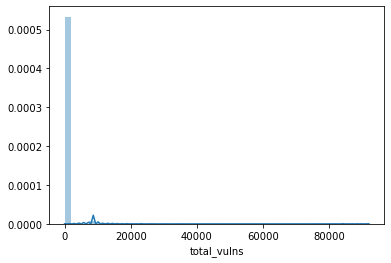

In [144]:
sns.distplot(a=df['total_vulns'], bins=50, hist=True, kde=True)

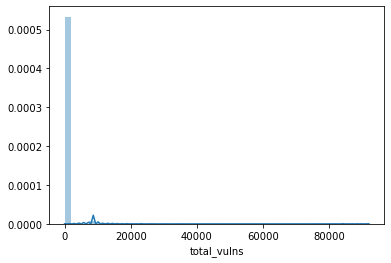

In [34]:
sns.distplot(a=df['total_vulns'], bins=50, hist=True, kde=True)

In [158]:
df.drop(index = df[df['total_vulns']>60].index, axis=0, inplace=True)

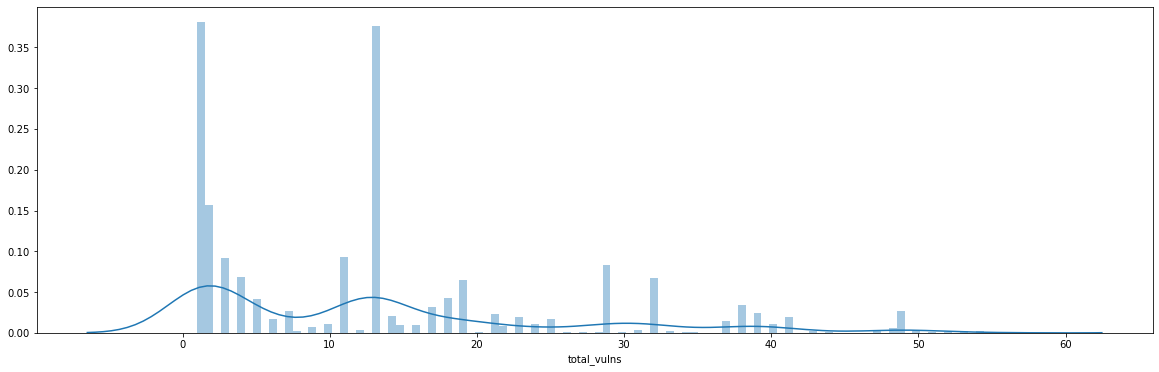

In [89]:
plt.figure(figsize=(20,6))
sns.distplot(a=df['total_vulns'], bins=100, kde=True)

In [43]:
df.columns

Index(['total_vulns', 'type', 'cvss_score', 'cvss_base_score',
       'severity_level', 'cvss_severity', 'cvss_temporal', 'category',
       'cvss.access.complexity', 'cvss.access.vector', 'cvss.authentication',
       'cvss.base', 'cvss.exploitability', 'cvss.impact.availability',
       'cvss.impact.confidentiality', 'cvss.impact.integrity',
       'cvss.remediation_level', 'cvss.report_confidence', 'Exploited',
       'vendor', 'tag'],
      dtype='object')

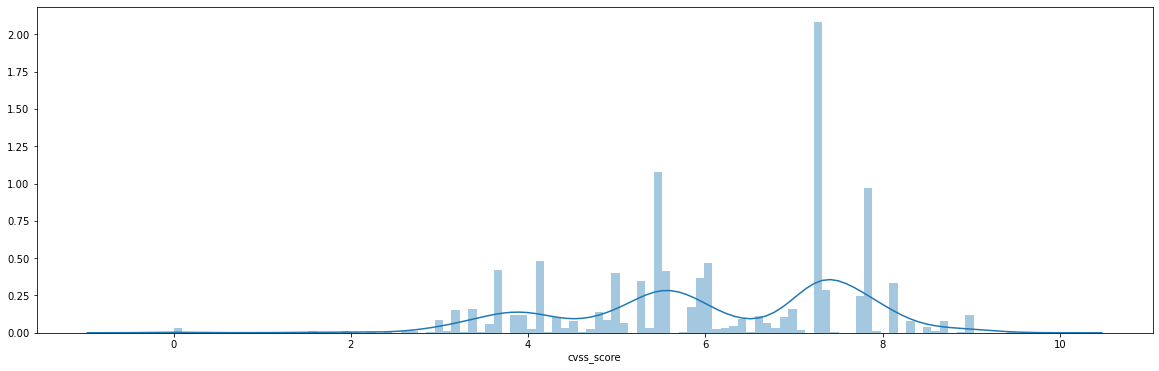

In [90]:
plt.figure(figsize=(20,6))
sns.distplot(a=df['cvss_score'], bins=100, kde=True)

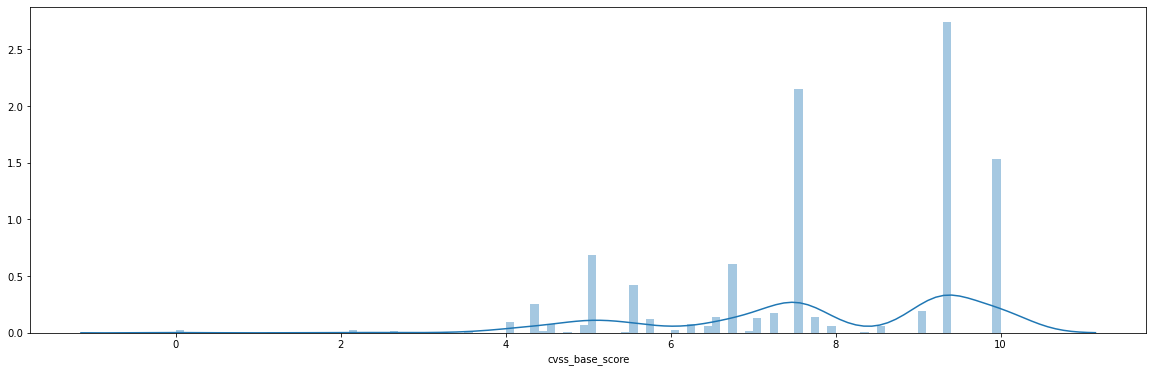

In [91]:
plt.figure(figsize=(20,6))
sns.distplot(a=df['cvss_base_score'], bins=100, kde=True)

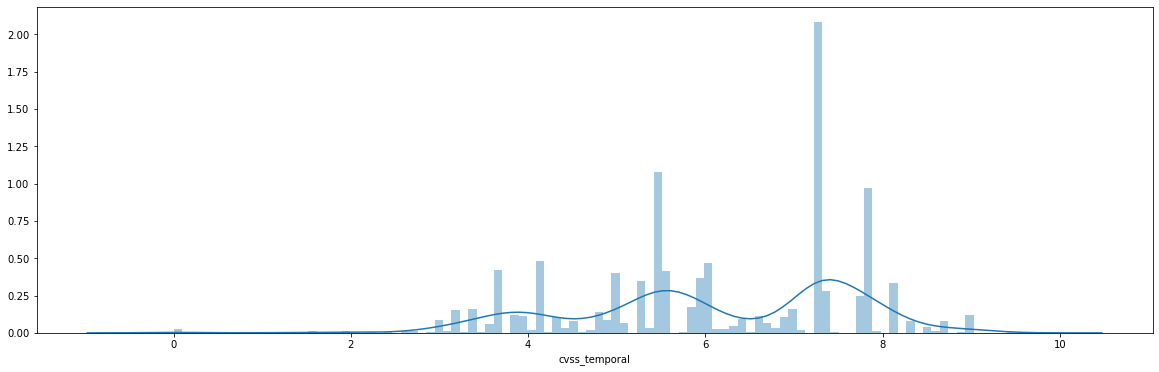

In [92]:
plt.figure(figsize=(20,6))
sns.distplot(a=df['cvss_temporal'], bins=100, kde=True)

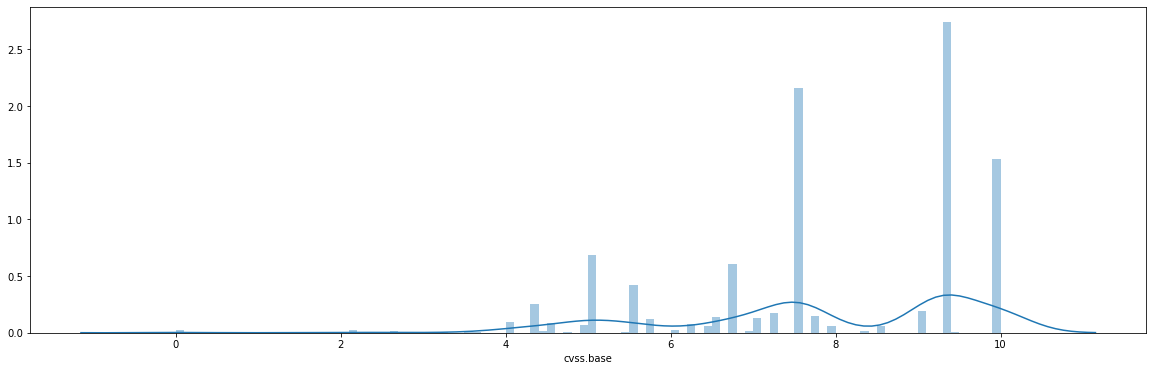

In [93]:
plt.figure(figsize=(20,6))
sns.distplot(a=df['cvss.base'], bins=100, kde=True)

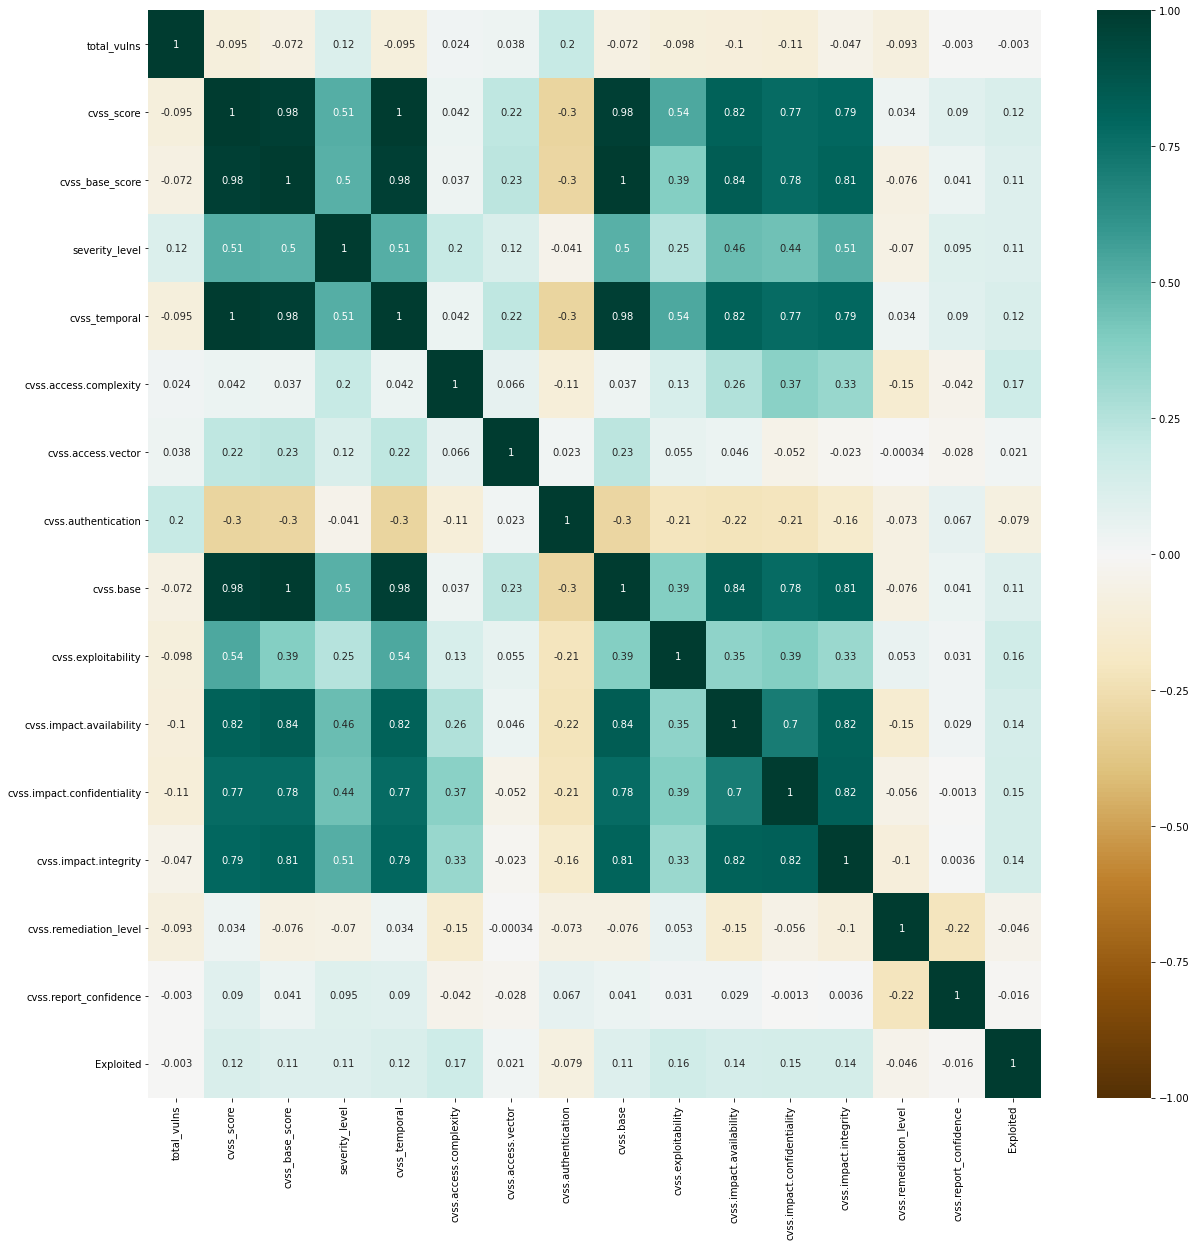

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [146]:
df.shape

(3268, 21)

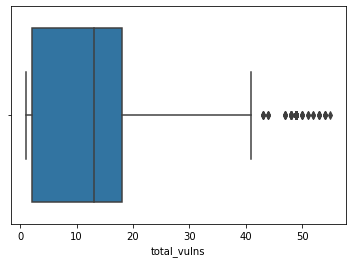

In [98]:
sns.boxplot(df['total_vulns'])

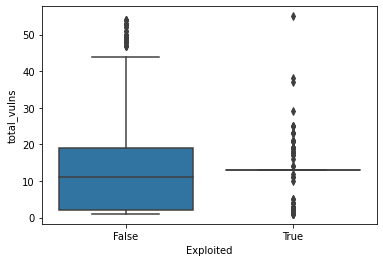

In [147]:
sns.boxplot(x=df['Exploited'], y=df['total_vulns'])

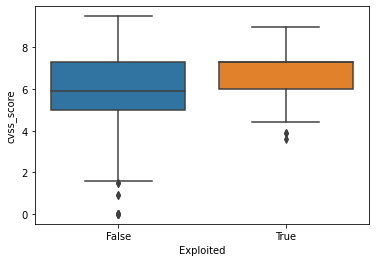

In [100]:
sns.boxplot(x=df['Exploited'], y=df['cvss_score'])

In [148]:
df.columns

Index(['total_vulns', 'type', 'cvss_score', 'cvss_base_score',
       'severity_level', 'cvss_severity', 'cvss_temporal', 'category',
       'cvss.access.complexity', 'cvss.access.vector', 'cvss.authentication',
       'cvss.base', 'cvss.exploitability', 'cvss.impact.availability',
       'cvss.impact.confidentiality', 'cvss.impact.integrity',
       'cvss.remediation_level', 'cvss.report_confidence', 'Exploited',
       'vendor', 'tag'],
      dtype='object')

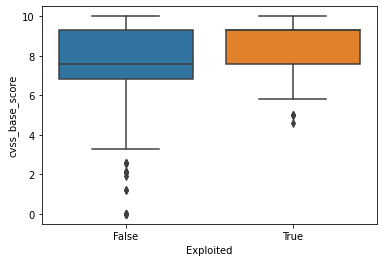

In [102]:
sns.boxplot(x=df['Exploited'], y=df['cvss_base_score'])

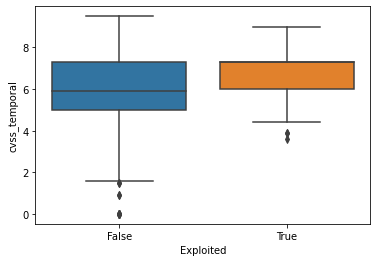

In [103]:
sns.boxplot(x=df['Exploited'], y=df['cvss_temporal'])

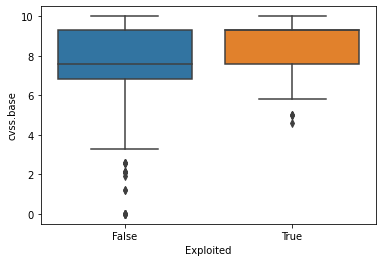

In [104]:
sns.boxplot(x=df['Exploited'], y=df['cvss.base'])

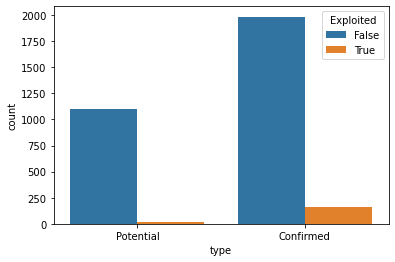

In [106]:
sns.countplot(x ='type', hue = "Exploited", data = df)

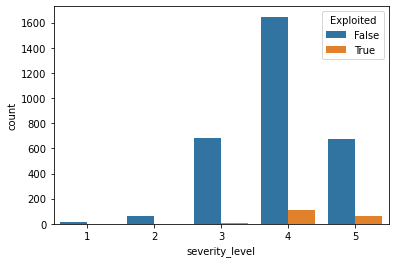

In [109]:
sns.countplot(x ='severity_level', hue = "Exploited", data = df)

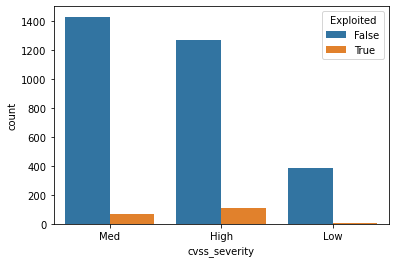

In [110]:
sns.countplot(x ='cvss_severity', hue = "Exploited", data = df)

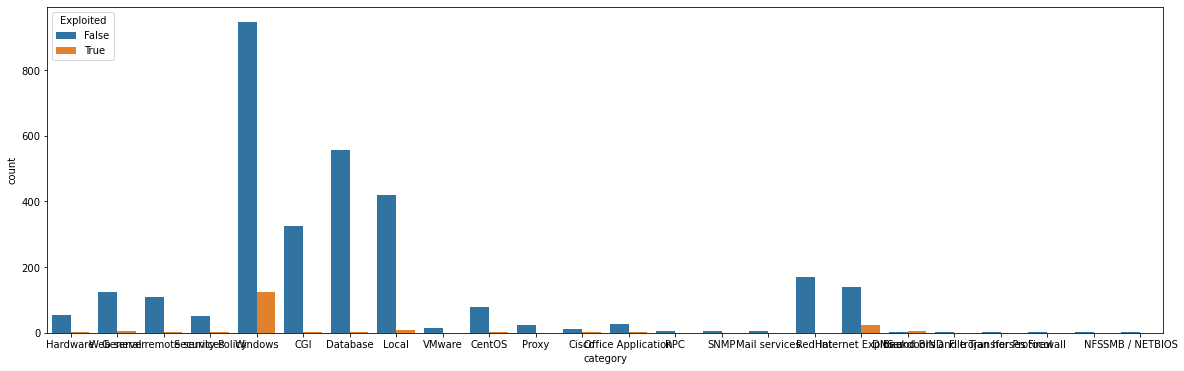

In [112]:
plt.figure(figsize=(20,6))
sns.countplot(x ='category', hue = "Exploited", data = df)

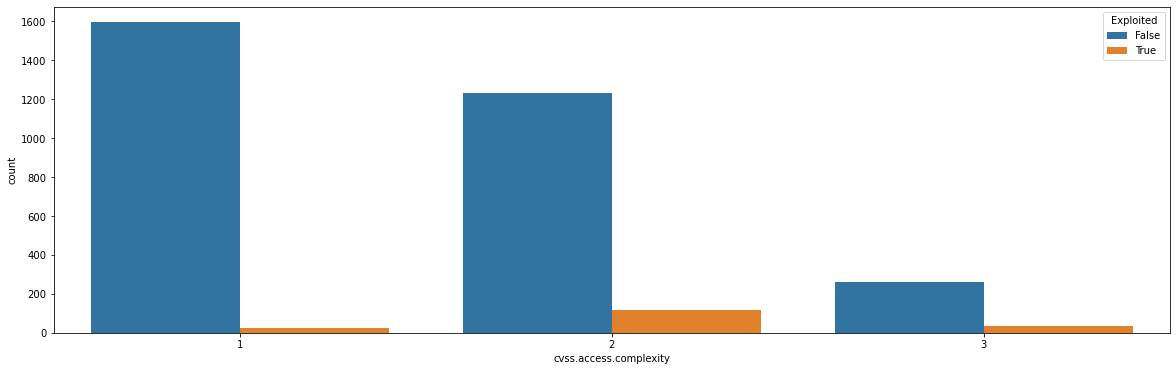

In [113]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.access.complexity', hue = "Exploited", data = df)

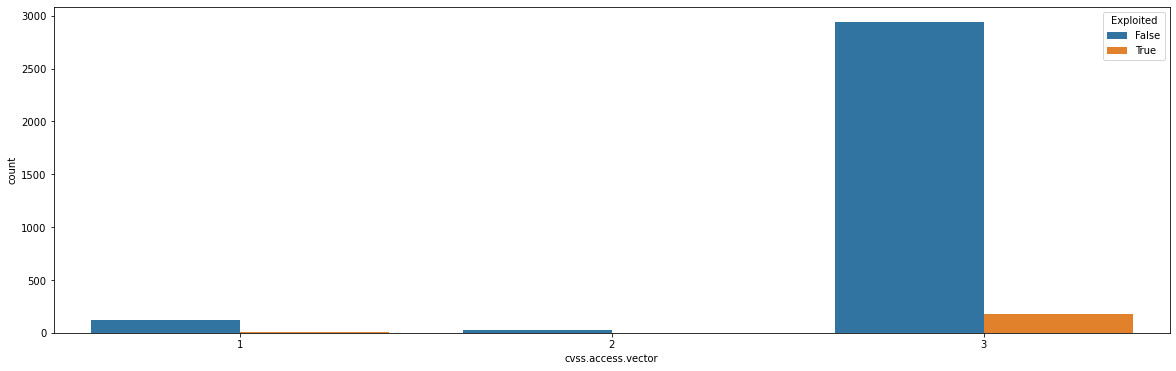

In [116]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.access.vector', hue = "Exploited", data = df)

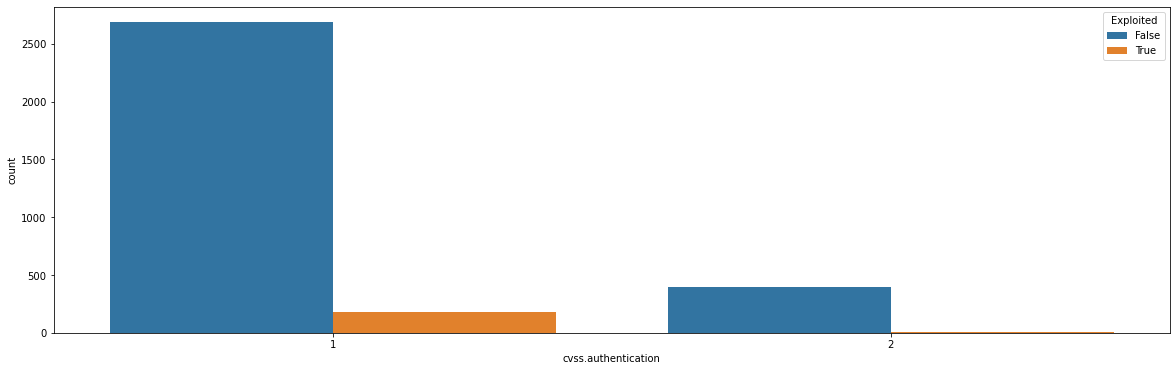

In [117]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.authentication', hue = "Exploited", data = df)

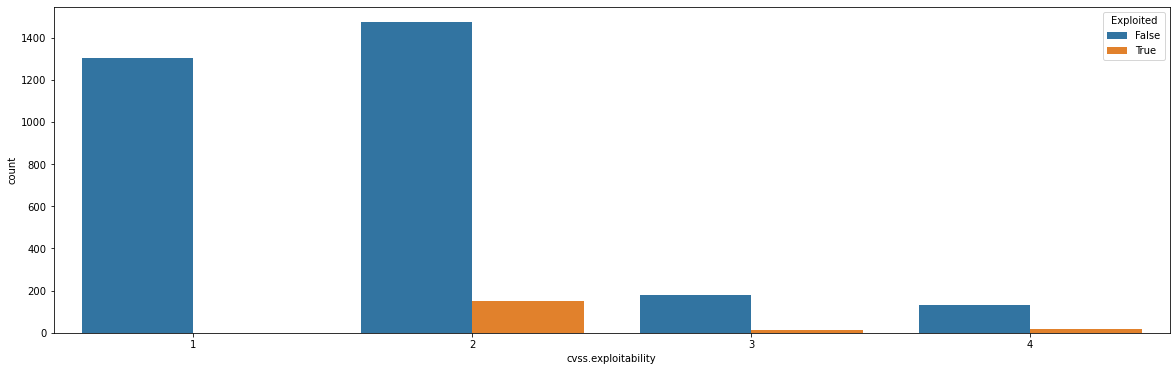

In [118]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.exploitability', hue = "Exploited", data = df)

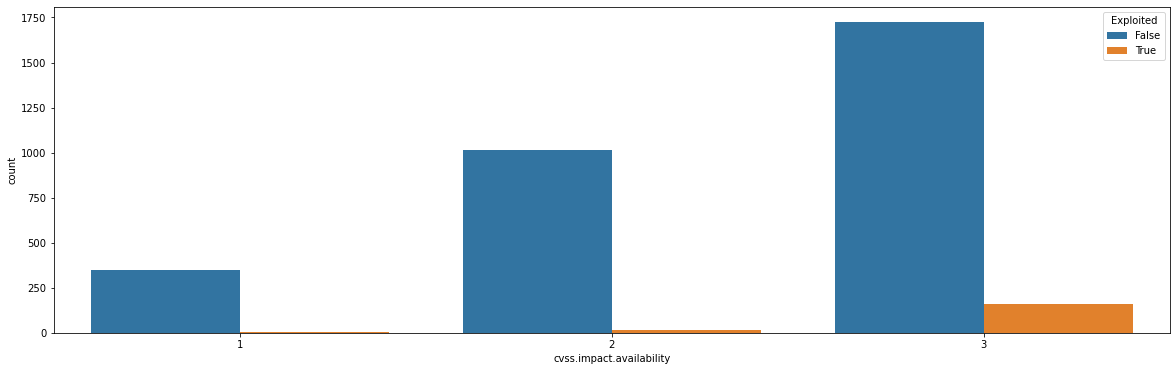

In [119]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.impact.availability', hue = "Exploited", data = df)

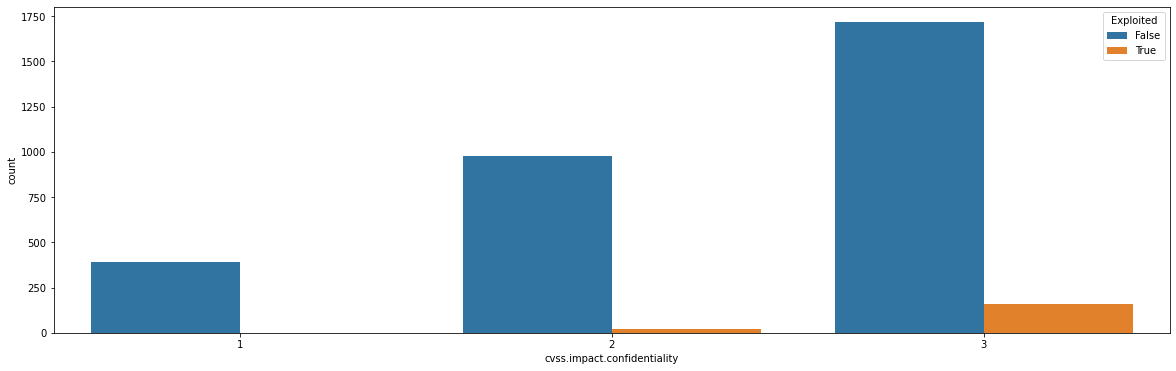

In [120]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.impact.confidentiality', hue = "Exploited", data = df)

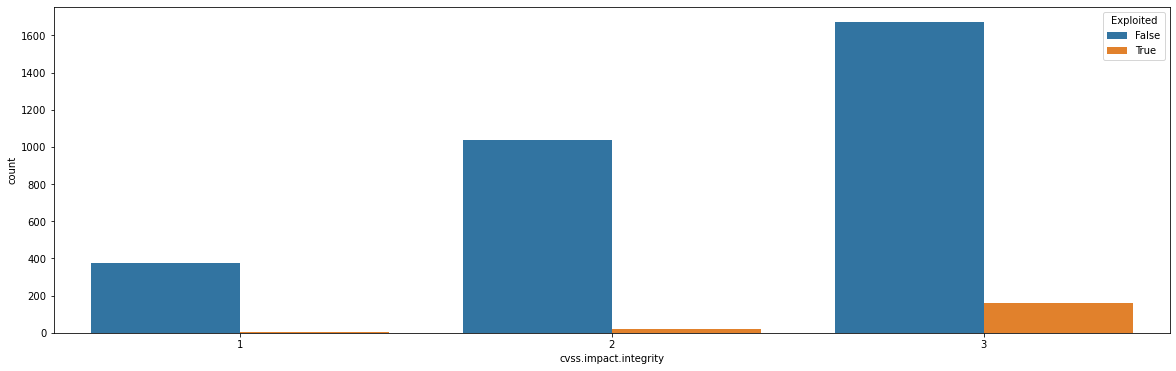

In [122]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.impact.integrity', hue = "Exploited", data = df)

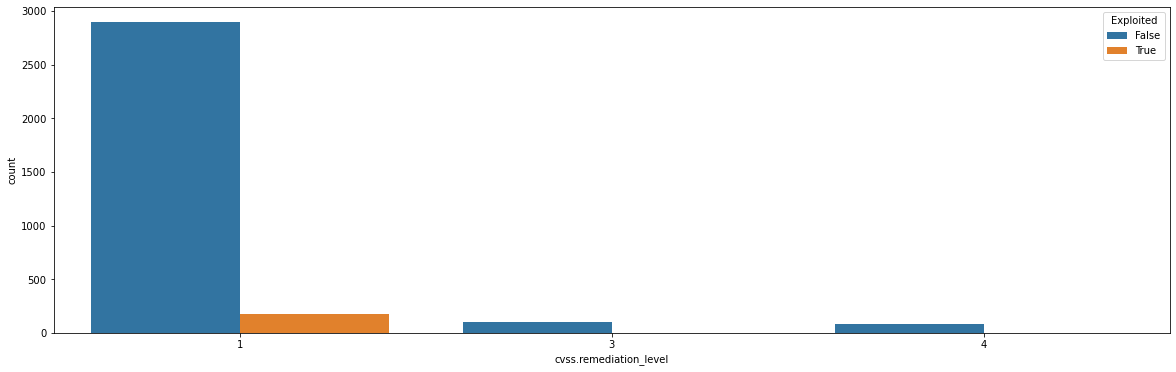

In [123]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.remediation_level', hue = "Exploited", data = df)

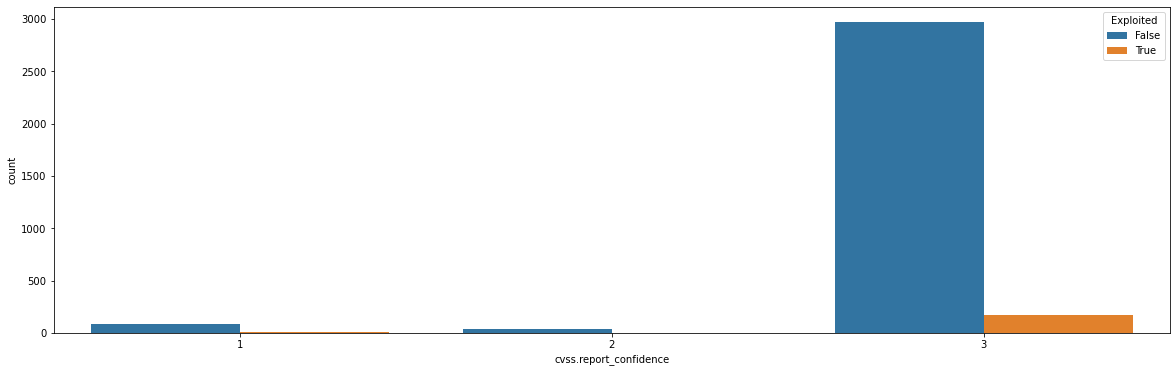

In [124]:
plt.figure(figsize=(20,6))
sns.countplot(x ='cvss.report_confidence', hue = "Exploited", data = df)

In [149]:
df.columns

Index(['total_vulns', 'type', 'cvss_score', 'cvss_base_score',
       'severity_level', 'cvss_severity', 'cvss_temporal', 'category',
       'cvss.access.complexity', 'cvss.access.vector', 'cvss.authentication',
       'cvss.base', 'cvss.exploitability', 'cvss.impact.availability',
       'cvss.impact.confidentiality', 'cvss.impact.integrity',
       'cvss.remediation_level', 'cvss.report_confidence', 'Exploited',
       'vendor', 'tag'],
      dtype='object')

In [159]:
df['Exploited'].unique()

array([ True, False])

In [163]:
df['Exploited'].value_counts()

0    3086
1     182
Name: Exploited, dtype: int64

In [162]:
df = df.replace({'Exploited': {True: 1, 
                                False: 0}})

In [153]:
df['Exploited'].value_counts()

Series([], Name: Exploited, dtype: int64)

In [164]:
df['type'].unique()

array(['Potential', 'Confirmed'], dtype=object)

df['Exploited']= df['Exploited'].map({'False':0, 'True':1})

In [165]:
df['type']= df['type'].map({'Potential':0, 'Confirmed':1})

In [166]:
df['cvss_severity'].unique()

array(['Med', 'High', 'Low'], dtype=object)

In [167]:
df['cvss_severity']= df['cvss_severity'].map({'Med':0, 'High':1, 'Low':2})

In [168]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
total_vulns,3268.0,13.07,12.48,1.0,2.0,13.0,18.0,55.0
type,3268.0,0.66,0.47,0.0,0.0,1.0,1.0,1.0
cvss_score,3268.0,6.10,1.54,0.0,5.1,6.0,7.3,9.5
cvss_base_score,3268.0,7.84,1.83,0.0,6.8,7.6,9.3,10.0
severity_level,3268.0,3.96,0.75,1.0,4.0,4.0,4.0,5.0
cvss_severity,3268.0,0.66,0.68,0.0,0.0,1.0,1.0,2.0
cvss_temporal,3268.0,6.10,1.54,0.0,5.1,6.0,7.3,9.5
cvss.access.complexity,3268.0,1.59,0.65,1.0,1.0,2.0,2.0,3.0
cvss.access.vector,3268.0,2.92,0.39,1.0,3.0,3.0,3.0,3.0
cvss.authentication,3268.0,1.12,0.33,1.0,1.0,1.0,1.0,2.0


In [169]:
df.shape

(3268, 21)

In [170]:
df.isna().sum()

total_vulns                    0
type                           0
cvss_score                     0
cvss_base_score                0
severity_level                 0
cvss_severity                  0
cvss_temporal                  0
category                       0
cvss.access.complexity         0
cvss.access.vector             0
cvss.authentication            0
cvss.base                      0
cvss.exploitability            0
cvss.impact.availability       0
cvss.impact.confidentiality    0
cvss.impact.integrity          0
cvss.remediation_level         0
cvss.report_confidence         0
Exploited                      0
vendor                         0
tag                            0
dtype: int64

In [171]:
data=pd.get_dummies(df,drop_first=True)

In [172]:
data.shape

(3268, 73)

In [173]:
data['Exploited'].value_counts()

0    3086
1     182
Name: Exploited, dtype: int64

In [174]:
x=data.drop(['Exploited'],axis=1)
y=data['Exploited']

In [175]:
x.shape

(3268, 72)

In [176]:
y.shape

(3268,)

In [178]:
pip install imblearn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1
Note: you may need to restart the kernel to use updated packages.


In [179]:
from imblearn.over_sampling import RandomOverSampler

In [187]:
os =  RandomOverSampler()

In [189]:
X_train_res_1, y_train_res_1 = os.fit_resample(x, y)

In [190]:
X_train_res_1.shape, y_train_res_1.shape

((6172, 72), (6172,))

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train_res_1, y_train_res_1,test_size=0.20,random_state=0)

In [193]:
from sklearn.tree import DecisionTreeClassifier
classifier_1 = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
classifier_1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [195]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_1.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[442 172]
 [ 15 606]]


0.848582995951417

In [196]:
from sklearn.linear_model import LogisticRegression
classifier_2 = LogisticRegression(random_state = 1)
classifier_2.fit(x_train, y_train)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_2.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[420 194]
 [ 78 543]]


0.7797570850202429

In [199]:
from sklearn.naive_bayes import GaussianNB
classifier_3 = GaussianNB()
classifier_3.fit(x_train, y_train)

GaussianNB()

In [200]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_3.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[251 363]
 [ 32 589]]


0.680161943319838

In [201]:
from sklearn.neighbors import KNeighborsClassifier
classifier_4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_4.fit(x_train, y_train)

KNeighborsClassifier()

In [202]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_4.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[457 157]
 [ 50 571]]


0.8323886639676114

In [225]:
df2 = (pd.DataFrame({'decision tree':'84%','Logistic regression':'78%', 'naive bayes':'68%', 'KNN':'83%'}, index=[0]))

In [226]:
df2

,decision tree,Logistic regression,naive bayes,KNN
0,84%,78%,68%,83%
